In [5]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

C:\Users\rud92\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [7]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model_lor.predict(X)
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[337  20]
 [ 30 182]]


* 정확도

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)  #예측 결과, 실젯값 비교 
print("Accuracy:", accuracy)

* 정밀도

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)  #예측 결과, 실젯값 비교
print("Precision:", precision)

* 재현율

In [9]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
print("Recall:", recall)

Recall: 0.8584905660377359


* F1 score

In [13]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [18]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

In [34]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_proba = model_lor.predict_proba(X) 

binarizer = Binarizer(threshold=0.1)    ##thresold=0.1로 변경 ##결과가 2차원 배열로 나옴
y_pred2 = binarizer.fit_transform(y_pred_proba[:, [0]])   ##클래스 0에 대한 확률을 선택 / 0.1 기준 01 변환 
y_pred2 = y_pred2.ravel()   #1차원 배열로 전환

cm2 = confusion_matrix(y, y_pred2)
acc2 = accuracy_score(y, y_pred2)
prec2 = precision_score(y, y_pred2)
rec2 = recall_score(y, y_pred2)
f1_2 = f1_score(y, y_pred2)

print("Confusion Matrix:")
print(cm2)
print("Accuracy:", acc2)
print("Precision:", prec2)
print("Recall:", rec2)
print("F1 Score:", f1_2)

Confusion Matrix:
[[  1 356]
 [139  73]]
Accuracy: 0.13005272407732865
Precision: 0.17016317016317017
Recall: 0.3443396226415094
F1 Score: 0.22776911076443057


* ROC 곡선 시각화

In [26]:
from sklearn.metrics import roc_curve,  roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y, y_pred_proba[:, 1])

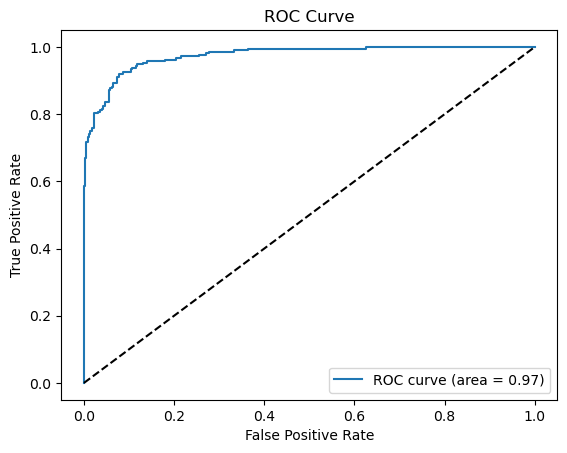

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 (랜덤 추측)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

* ROC AUC 값

In [30]:
print("\nROC AUC:", roc_auc)


ROC AUC: 0.9741557000158554
